# Dimensionality Reduction - Linear cases

# PCA

Principal Component Analysis is a dimensionality reduction algorithm. The main steps of PCA are:

- **standardization**: to standardize the range of the continuous variables so that each of them contribute equally to the analysis. A common way to do that is by computing Z-score: $z = \frac{\text{data } - \text{ mean}}{\text{standard deviation}}$; this way all the data will have mean zero and standard deviation one.

- **covariance matrix**: its computation is useful in order to understand how variables vary from the mean with respect to each other. In other words, to understand if any data is correlated: if that is the case, there is going to be some information redundancy. So, the covariance matrix allows to see how variables covariate (they could be positive or negatively correlated).

- **extract eigenvalues and eigenvectors**: this is the step in which principal components are computed. PCs are new variables constructed as linear combinations of the starting variables, in such a way that they are uncorrelated and carrying the highest possible variance. PCA builds up new variables (PCs) where the first ones are those carrying most of the variance, so that each subsequent PC carries less variance than the previous one. So, the aim is to reduce dimensionality while keeping most of the explained variance. The first PC is found maximizing the variance (i.e. finding the eigenvector associated to the largest eigenvalue). The following ones are computed in the same way, but they have to be uncorrelated (orthogonal) to the previous ones.

- **data 'recasting'**: finding PCs does not change the actual data, which, in fact, it is still represented in terms of the original axes. So, in this step, data has to be reoriented from the original axes to the one represented by the PCs. This is done by multiplying the transpose of the original data by the transpose of the 'feature vector' (which is the matrix formed by the previously selected eigenvectors).

In practice, PCA is computed by three possible methods:

1. **Covariance**, used when data have similar scales;


2. **Correlation**, used when data have different scales;


3. **Singular Value Decomposition**, more general purpose.

**PROS**:

- It is good at extracting signal from noise
- Computationally inexpensive (time wise)
- Good for linear data

**CONS**:

- Not appropriate for non-linear data
- Variables are less interpretable after transformation
- Data standardization is required
- Information loss, even if PCA tries to maximize the variance, the number of PCs has to be selected with care.

### PCA first practical example

In [358]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from seaborn import color_palette
from matplotlib.lines import Line2D

In [3]:
#Load MNIST dataset

mnist = fetch_openml('mnist_784')

MNIST is divided in ```data``` (which contains pixel for each image) and ```target``` (label indicating the real number associated to the image 0-9)

In [4]:
X = mnist.data / 255
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


Convert the matrix ```X``` and the vector ```y``` in a Pandas DataFrame:

In [5]:
feat_cols = [i for i in X.columns] #name of the columns (from pixel1 to pixel784)

df = pd.DataFrame(X)
df['y'] = y
df['label'] = df['y'].apply(lambda i : str(i)) #transform each y value, from an integer into a string

print(f'Size of the DataFrame: {df.shape}')

Size of the DataFrame: (70000, 786)


In [6]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


Since the dataset is sorted by y labels, it's wise to shuffle it

In [7]:
np.random.seed(42)

df_shuffled = df.sample(frac = 1)

In [8]:
pca = PCA(n_components = 3)

#we use featcol of df, since it does not contain y
pca_result = pca.fit_transform(df[feat_cols].values) #train the model and apply it to the testing data in one shot (since train and test data are the same in this case)
df['pc_one'] = pca_result[:, 0]
df['pc_two'] = pca_result[:, 1]
df['pc_three'] = pca_result[:, 2]

print(f'Explained variation per principal component {pca.explained_variance_ratio_}')

Explained variation per principal component [0.09746116 0.07155445 0.06149531]


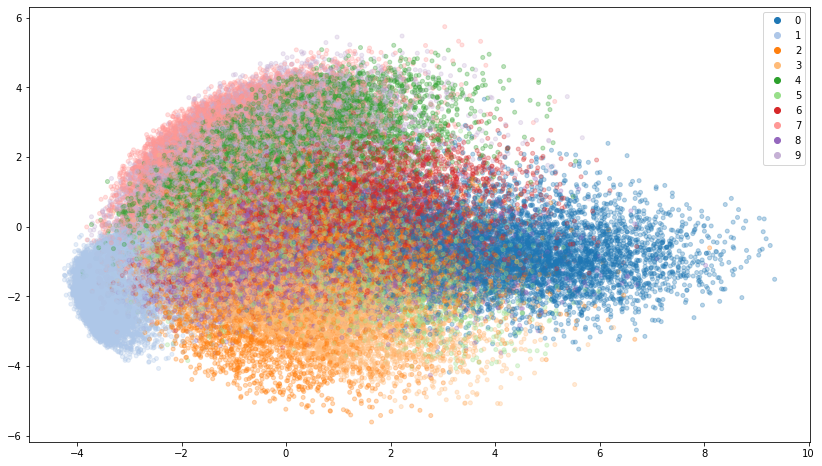

In [11]:
colors = color_palette('tab20')

fig = plt.figure(figsize = (14, 8))

plt.scatter(x = df.pc_one, y = df.pc_two, s = 16, color = [colors[i] for i in df.y.transform(lambda x : int(x))],
            alpha = 0.3)

custom_legend = []

for i in sorted(df.y.transform(lambda x : int(x)).unique()):
    custom_legend.append(Line2D([0], [0], marker = 'o', color = colors[i], label = i, markersize = 6, linewidth = 0))


plt.legend(handles = custom_legend)

plt.show()

equivalently:

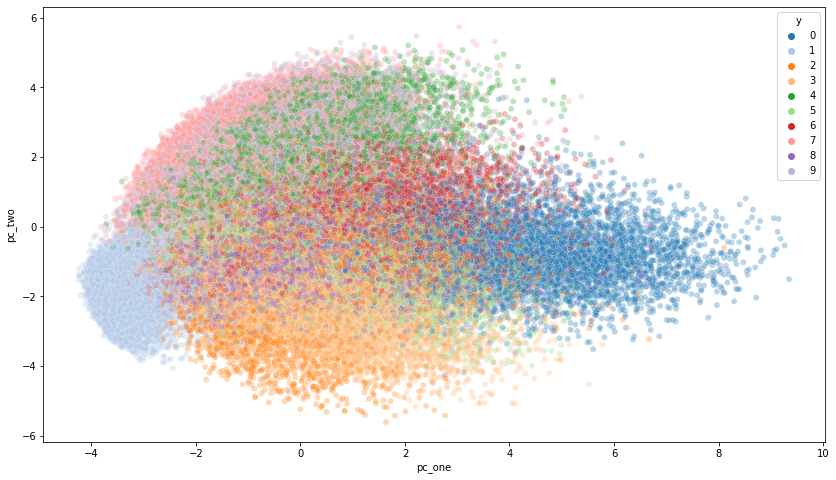

In [141]:
import seaborn as sns

plt.figure(figsize = (14, 8))

sns.scatterplot(x = df.pc_one, y = df.pc_two, hue = df.y,
           palette = sns.color_palette('tab20', 10),
           legend = 'full',
           alpha = 0.3)

plt.show()

## PCA second example

In [214]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

In [218]:
breast = load_breast_cancer()

X = breast.data
y = breast.target

print(X.shape, y.shape)

(569, 30) (569,)


In [252]:
feat_cols = [i for i in breast.feature_names] #name of the columns (from pixel1 to pixel784)

df = pd.DataFrame(X, columns = feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i : str(i)) #transform each y value, from an integer into a string

print(f'Size of the DataFrame: {df.shape}')

Size of the DataFrame: (569, 32)


In [253]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0


In [254]:
np.random.seed(42)

df_shuffled = df.sample(frac = 1)

In [272]:
pca = PCA(n_components = 2)

#we use featcol of df, since it does not contain y
pca_result = pca.fit_transform(df[feat_cols].values) #train the model and apply it to the testing data in one shot (since train and test data are the same in this case)
df['pc_one'] = pca_result[:, 0]
df['pc_two'] = pca_result[:, 1]

print(f'Explained variation per principal component {pca.explained_variance_ratio_}')

Explained variation per principal component [0.98204467 0.01617649]


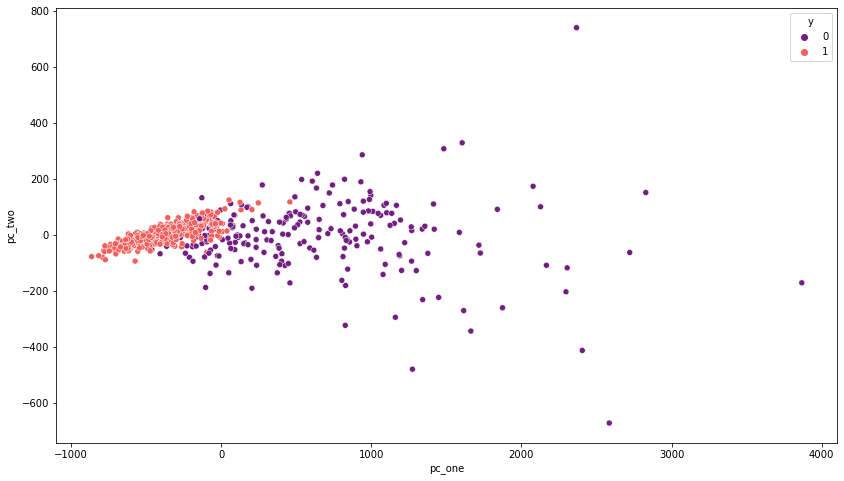

In [275]:
import seaborn as sns

plt.figure(figsize = (14, 8))

sns.scatterplot(x = df.pc_one, y = df.pc_two, hue = df.y,
           palette = sns.color_palette('magma', 2),
           legend = 'full')

plt.show()

## Multidimensional Scaling (MDS)

Multidimensional Scaling is a family of dimensionality reduction algorithms. *MDS* tries to find an embedding of n objects into a r-dimensional euiclidean space $R^n$ in order to preserve (a function of) the distances or similarities - depending on the chosen object function - between the original objects. In this sense, MDS is a derivation from PCA, whose objective is not to maximize the variance, but trying to keep the distance between points in the projected space as closer as possible to the original distance in the original space.

*MDS*'s typical distance functions are:

- **classical mds**, also known as Pricipal Coordinates Analysis (*PCoA*), it measures the original distances between objects and the loss function to minimize is the **strain** function. If there exists a space $R^p$ where all the original distances between objects are preserved, the distance *d* is called euclidean. In this case the solution is deterministic (there is an analytic solution). Classical MDS is optimal for euclidean input data and when the inner products matrix has non-negative eigenvalues (i.e. positive semidefinite), it is fast in its execution, may not work very well if the inner products matrix has negative eigenvalues (in practice it may be used anyway).


- **metric mds**, it is a superset of classical MDS, so that it generalizes the optimization procedure to other kind of loss functions. A popular function to minimize is called **stress** and it involves a function of the original distances. In metric mds we can find **Sammon mapping** that is able to preserve the small $d_{ij}$ giving them a greater degree of importance in the fitting procedure that for larger $d_{ij}$. With respect to classical *MDS*, Sammon mapping better preserves inter-distances for smaler dissimilarities, while proportionally squeezes the inter-distances for larger dissimilarities.


- **non-metric mds**, it finds a non-parametric monotonic relationship between the dissimilarities in the item-item matrix and the Euclidean dsitances between the items; it also finds the location of each item in the low-dimensional space. In this case, dissimilarities are known only by their rank order (so, their the spacing between succesively ranked dissimilarities is unavailable or simply not interesting for the kind of data); the function is implicitly defined as a regression curve and it preserves the order of d, without caring about the actual values. A common algorithm in non-metric MDS is Kruskal mds. In other words, it is possibile to say that with non-metric MDS absolute values are not considered as meaningful, only the ranking is important, so that MDS tries to find a low-dimensional representation that respects the ranking of distances. Non-metric MDS Fulfills a clear objective without many assumptions (just minimize stress), results do not change with rescaling or monotonic variable transformation, it works even if starting just from ranking information. By the way, it is slow in large problems, usually it is able to found a local (not global) optimum.

In metric and non-metric case, the process is given by optimization (deteriministic solution is not feasible).

### Example of MDS




- Classical MDS: As an example we can take geographic data, like a dataset representing the approximate road distances between cities. MDS may provide a 'map' of their relative locations in 2d - even if with some distortions. In these cases, where data is not coming from a Euclidean space, negative eigenvalues may be expected (differently from PCA); that's not a problem, since changing the signs brings a conventional representation in the orientation of the cities. This happens because the extracted components have an absolute meaning. This way it is possibile to get, just starting from the road distances of cities, an good approximation of the real map under the longitudes and latitudes coordinates. So, it is possibile to state that in cases like these, MDS can determine, with a certain degree of accuracy, the structure of the dataset, just based on the concept of mutual distances.


- Non-metric MDS: In the study of Ekman (1954), 14 colors have been picked up, differring only in their hue (wavelength), and their similarity is judged through an interobserver agreement (IOA) between 31 people, in a scale from 0 up to 5. What is obtained is a (dissimilarity) matrix pointing out how much colors are correlated each others. Values have also been scaled in order to reduce their range in 0-1, so that 0 corresponds to 0 (no observer agrees on the pair of colors being similar) and 1 corresponds to 5 (all the observers agrees on the pair of colors being similar). Therefore, dissimilarities are easily obtained by 1 - the similarity value. Through non-metric MDS 14 points (representing each color) are projected in two dimension, so that the distances expressed in the aforementioned dissimilarity matrix are mostly preserved in the new space. What is astonishing about this is that the projection resembles the color wheel. As in this case, non-metric MDS involves ranking rather than proper distances.


### When only non-metric MDS is adequate wrt other kind of MDS

In the case of a dissimilarity matrix, which is not a distance matrix, classical MDS gives inconsistents results. In these cases Non-metric MDS is highly suggested over classical MDS. To have a general theoretical grip: in all the cases/experiments in which an interobserver agreement (IOA) between people, instead of actual distances, is used in the construction of the dissimilarity matrix. As a practical example: The Ekman colors study, the perception of similarity between different sports, ...


### Difference between PCA and MDS

While PCA aims at describe the principal components (linear combinations) of a dataset that is able to explain the largest amount of variation, MDS, instead, aims at constructing a reduced dimensionality space so that the projected points preserve the mutual distances, inherited from the original dataset: the distance they have in the original dataset are - more or less - preserved in the projected space. When is this useful? In the case of objects of very different nature, for which there is no possible description in a feature space; examples of such cases are objects like drugs, images, trees or other complex objects without any obvious coordinates in $R^n$. Despite that, a dissimilarity matrix can be constructed, that explains the mutual separation between these objects.
Differently from PCA, MDS can produce some negative eigenvalues and this is due to the fact that the data do not come from a Euclidean space.

# Dimensionality reduction - Non linear cases

## T-SNE

A problem of **PCA** is that it targets the dimensionality of the data and tries to preserve large pairwise distances in the map, but cannot catch the real structure of the data. So PCA is good at catching large variation in the data.
For example, PCA is able to explain 90% of the variance of the swiss roll data, however the projection is not accurate on representing the real structure (i.e. real distances are not coherent). That is why algorithms like T-SNE are useful.


T-Distributed Stochastic Neighbor Embedding may be seen as a 'solution' to this problem. The main idea behind TSNE is that what is reliable in dimensionality reduction are the very small euclidean distances between neighbouring points, so what is actually determining the overall structure of a dataset - and also conditioning its projection - is the concept of neighbourhood.


**Brief description**:

To understand better this neighbouring concept, let us suppose to have a multidimensional dataset, the objective here is to use a Gaussian function in order to weight the distances of the neighbouring points, for each data entry. So, a "circle" is drawn around each data, such that the closer a data is to the circle the smaller the distance is. Clearly, depending on the radius of the circle, the number of catched neighbours increases or decreases. The idea is to construct a smoothing distance function, on a space that may not have a distance function in order to construct the concept of metric neighbourhood.

Let us take into account a dataset lying in an high-dimensional space, the aim of TSNE is that of constructing a map that projects the original high-dimensional space into a new and lower-dimensional space. In order to do so, is necessary to properly define the distances on the two spaces. In the original (high-dimensional) space we define a Gaussian distance between each pair of points:


$$
p_{ij} =  \frac{\text{exp } (-\frac{||x_i - x_j||^2}{2\sigma^2})}{\sum_{k \neq l} \text{exp} (-\frac{||x_k - x_l||^2}{2\sigma^2})}
$$


which is the exponential of the inverse of the norm of the vectors $x_i$ and $x_j$ (divided by $2\sigma^2$), this quantity is then averaged by the sum of the exponential of the inverse of all the possibile distances (divided by $2\sigma^2$) in the dataset.

On the low-dimensional space, the set up distance is given by the t-student distribution:

$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}
$$


which is one plus the inverse of the norm of the difference between the two images, squared; and this quantity is then averaged by the sum of all possibile mutual distances between all the projected points of the dataset.


The core of TSNE is finding the minimum of the so-called *Kullback-Leiber* divergence function:

$$
C = \text{KL(P || Q)} = \sum_{i=1}^{n} \sum_{j=1}^{n} p_{ij} \text{ log }\frac{p_{ij}}{q_{ij}}
$$


**Novelties of TSNE wrt previous algorithms**:

- it uses joint, instead of conditional, probabilities; this introduces simmetry in the formulation of the problem and optimizing KL function is computationally much simpler.

- In the previous attempts of using this kind of solution, the Gaussian modelling was used on both the original (high-dimension) and the target (lower-dimension) space. TSNE, instead, uses t-distribution on the low-dimensional space which help on the solution of the problem; that is because of the heavy tails of such distribution that alleviate both the *optimization problem* and the *crowding problem*:

    1. **The optimization problem** consists in the 'burden' of solving the KL problem.
    2. In order to understand the **crowding problem** it has to be taken into account the fact that the volume of a sphere centered on a given data point $i$ scales as $r^m$ (r is the radius and m the dimensionality of the sphere); if we want to model accurately the small distances, most of the points that are at a moderate distance from datapoint $i$ will have to be placed much far away in the two-dimensional map. In few words, this problem consists in the impossibility to preserve the distance in all neighbourhood. So, using the t-student distribution, this problem is alleviated by correcting the volume differences between both spaces. and this happens because t-student distribution allows a moderate distance in the high-dimensional space to be preserved by a much larger distance in the map, in this way the unwanted attractive forces between map points that represent moderately dissimilar data points are eliminated. In order to fully understand this point, it has to be remembered that the ma's representation of joint probabilities is intrinsically invariant to changes in the scale of the map, for map points that are far apart.
    
    
**Optimization step**:

Since the KL divergence function is not symmetric, different types of error in the pairwise distances in the low-dimensional map are not weighted equally. In fact, there is a large cost for using widely separated map points to represent nearby data points (i.e. a big penalty is paid if distanciating too much points that are actually close), while there is a small cost to closely map those points that are widely separated. The solution to this problem is found using the *gradient descent* algorithm used to find the minimum of a function (i.e. consecutive steps, proportional to the negative of the gradient of the function at the current point, are taken).


**TSNE optimization**:

$$
\frac{\delta C}{\delta y_i} = 4 \sum_j (p_{ij} - q_{ij})(y_i - y_j) (1 + ||y_i - y_j||^2)^{-1}
$$

this formula is called *n bodies elastic system* and what it does is repelling dissimilar data points that are modeled by a small pairwise distance in the low-dimensional representation; these repulsions, do not go to infinity though. There are two methods in order to ease these repulsions:

- **easy compression**, force the map points to stay close together at the start of the optimization, if they are modeled by a small pairwise distance. This is done adding an additional l2 penalty (square of the absolute value) to the cost function, that is proportional to the sum of squared distances of the map points from the origin.


- **early exaggeration**: multiply all the $p_{ij}$ distances in the original space by a constant, modeling the large $p_{ij}$ by fairly large $q_{ij}$; in this way, natural clusters tend to form tight widely separated clusters in the map.


**the perplexity hyperparameter**:

The only parameter that appear in the original formula of TSNE is the variance $\sigma_i$ for the high-dimensioanl Gaussian of $p_{ij}$. Of course there is not a unique optimal value $\sigma_i$ for all the data points in the dataset, that is because the density of the data is likely to vary. In dense regions, a smaller $\sigma_i$ is usually more appropriate than in sparse regions. In general, any particular value of $\sigma_i$ induces a different probability distribution $P_i$ that has an entropy which increases as $\sigma_i$ increases.

TSNE performs a binary search for all the value of $\sigma_i$ that produces a $P_i$ with a fixed perplexity that is specified by the user

$$
\text{Perp}(P_i) = 2^{H(P_i)} = 2^{\sum_jp_{ij} \text{log}_2 (p_{ij})}
$$

Perplexity can be interpreted as a smooth measure of the effective number of neighbors (typical values are between 5 and 50).

**Drawbacks of TSNE**:
- it does not output transformation. This is not giving back a map projecting the whole space where the dataset lies into the target dataset. That means that it is only mapping the specific points of the dataset.

- Stochastic, statistically based.

- The output space is hard to interpret in a geometrical point of view.

- the choice of the perplexity is critical to the results.

- Assessing different visualizations at different tuning of perplexity is needed in order to understand the underlying topology of the starting dataset.

- For extreme values of perplexity (and sometimes even not so extreme values) artifacts may appear.

- Altough TSNE does a very good job in clustering together points that have to stay together, the size of the cluster and also the distance between different clusters is not geometrically meaningful.

- Since KL optimization is a computational expensive algorithm, applying it to large datasets can take long time.



### Where TSNE > PCA and MDS

If we consider MNIST dataset, TSNE is way better wrt Sammon MdS. The cluster of different digits gets very well separated.
If we consider fashion-MNIST dataset, TSNE is way better than PCA.
If we consider the coil20 dataset, Sammon MdS is able to individuate some of the clusters, while TSNE is separating properly most of the classes (red, pink and black in particular).
If we consider the double swiss roll, which is the same as swiss roll, but with two layers, it is possible to see that PCA is able to explain 84% of the variance, but the two levels of the swiss roll are mixed together; the classical MdS has quite similar - and poor - results as the PCA; Sammon MdS is able to start differentiating the two layers of the roll; TSNE is definitely improving wrt the other algorithm, even if it is struggling and mixes up a bit the two layers.

## UMAP